In [1]:
import pandas as pd
from scripts import interrupted_time_series as its

In [2]:
deplatforming_df = pd.read_csv('results/bans.csv', sep = '\t') # Import the final deplatforming dataset

In [3]:
# Transform the attribute ban date in a list of ban dates
deplatforming_df.ban_date = deplatforming_df.ban_date.apply(lambda x: x.replace("{", "").replace("}", "").replace(",", "").replace("'", "").split())

## Interrupted Time Series for whole dataset 

In [4]:
drops, angles, _ = its.global_its(deplatforming_df, '/dlabdata1/reddit_rad/entities/')

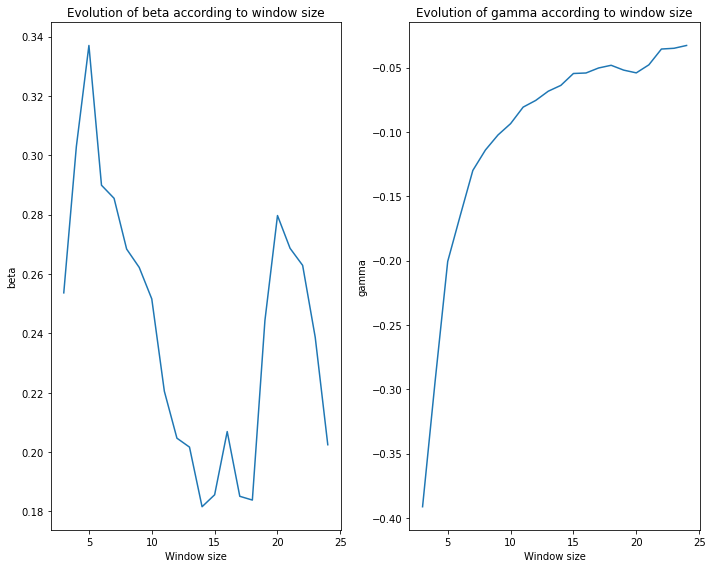

In [5]:
its.plot_params_by_window(drops, angles)

## Interrupted Times Series for individual entities 

### Without log 

                            OLS Regression Results                            
Dep. Variable:         norm_max_ratio   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     27.67
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           9.09e-07
Time:                        15:53:18   Log-Likelihood:                -10.680
No. Observations:                  21   AIC:                             29.36
Df Residuals:                      17   BIC:                             33.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.4782      0.306     -1.565   

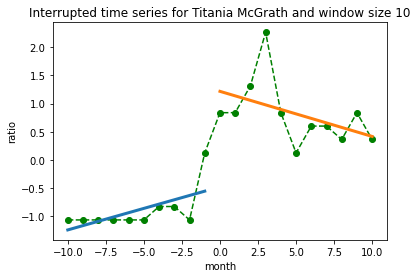

In [264]:
row = deplatforming_df.iloc[276]
df, _, _ = its.individual_time_series(row.entity, row.ban_date[0], 10, '/dlabdata1/reddit_rad/entities/', do_log = False, print_model = True)
its.plot_its(df, row.entity, 10)

                            OLS Regression Results                            
Dep. Variable:         norm_max_ratio   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.643
Date:                Wed, 09 Jun 2021   Prob (F-statistic):             0.0340
Time:                        15:14:59   Log-Likelihood:                -24.073
No. Observations:                  21   AIC:                             56.15
Df Residuals:                      17   BIC:                             60.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7901      0.578      3.097   

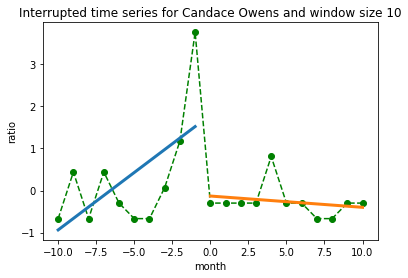

In [11]:
row = deplatforming_df.iloc[27]
df, _, _ = its.individual_time_series(row.entity, row.ban_date[0], 10, '/dlabdata1/reddit_rad/entities/', do_log = False, print_model = True)
its.plot_its(df, row.entity, 10)

### With log

                               OLS Regression Results                              
Dep. Variable:     np.log(max_ratio + 0.1)   R-squared:                       0.876
Model:                                 OLS   Adj. R-squared:                  0.854
Method:                      Least Squares   F-statistic:                     39.93
Date:                     Fri, 11 Jun 2021   Prob (F-statistic):           6.49e-08
Time:                             15:52:23   Log-Likelihood:                 18.500
No. Observations:                       21   AIC:                            -29.00
Df Residuals:                           17   BIC:                            -24.82
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

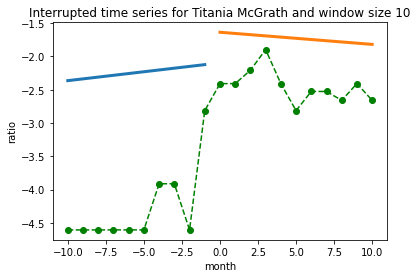

In [262]:
row = deplatforming_df.iloc[276]
df, _, _ = its.individual_time_series(row.entity, row.ban_date[0], 10, '/dlabdata1/reddit_rad/entities/', do_log = True, print_model = True)
its.plot_its(df, row.entity, 10, log = True)

                               OLS Regression Results                              
Dep. Variable:     np.log(max_ratio + 0.1)   R-squared:                       0.321
Model:                                 OLS   Adj. R-squared:                  0.201
Method:                      Least Squares   F-statistic:                     2.682
Date:                     Wed, 09 Jun 2021   Prob (F-statistic):             0.0796
Time:                             15:15:07   Log-Likelihood:                -8.3568
No. Observations:                       21   AIC:                             24.71
Df Residuals:                           17   BIC:                             28.89
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

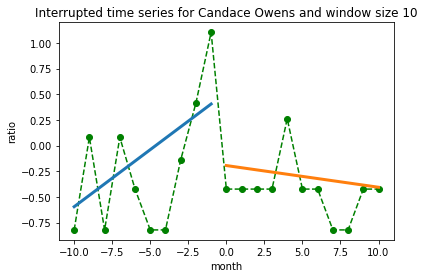

In [12]:
row = deplatforming_df.iloc[27]
df, _, _ = its.individual_time_series(row.entity, row.ban_date[0], 10, '/dlabdata1/reddit_rad/entities/', do_log = True, print_model = True)
its.plot_its(df, row.entity, 10, log = True)